In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Kaytie/Desktop/School/Regis University/Fall 2021/MSDS 670/Intake.csv')

In [3]:
to_drop = ['CASE_ID','CASE_PARTICIPANT_ID','RECEIVED_DATE','PARTICIPANT_STATUS','INCIDENT_CITY','INCIDENT_BEGIN_DATE','INCIDENT_END_DATE','LAW_ENFORCEMENT_UNIT','ARREST_DATE','FELONY_REVIEW_DATE']
df.drop(to_drop, inplace = True, axis = 1)
df.head(5)

,OFFENSE_CATEGORY,AGE_AT_INCIDENT,RACE,GENDER,LAW_ENFORCEMENT_AGENCY,FELONY_REVIEW_RESULT,UPDATE_OFFENSE_CATEGORY
0,PROMIS Conversion,25.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
1,PROMIS Conversion,22.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
2,PROMIS Conversion,19.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
3,PROMIS Conversion,NaN,Black,Male,CPD SPEC INV-YOUTH,Charge(S) Approved,Attempt Homicide
4,PROMIS Conversion,37.0,Hispanic,Male,SPEC. OPERATIONS,NaN,Narcotics


In [4]:
new_name = {'OFFENSE_CATEGORY': 'Offense',
           'AGE_AT_INCIDENT': 'Age',
           'RACE': 'Race',
           'GENDER': 'Gender',
           'LAW_ENFORCEMENT_AGENCY': 'Agency',
           'FELONY_REVIEW_RESULT': 'Review Result',
           'UPDATE_OFFENSE_CATEGORY': 'Offense Update'}
df.rename(columns=new_name, inplace = True)
df.head()

,Offense,Age,Race,Gender,Agency,Review Result,Offense Update
0,PROMIS Conversion,25.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
1,PROMIS Conversion,22.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
2,PROMIS Conversion,19.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
3,PROMIS Conversion,NaN,Black,Male,CPD SPEC INV-YOUTH,Charge(S) Approved,Attempt Homicide
4,PROMIS Conversion,37.0,Hispanic,Male,SPEC. OPERATIONS,NaN,Narcotics


In [5]:
df.columns

Index(['Offense', 'Age', 'Race', 'Gender', 'Agency', 'Review Result',
       'Offense Update'],
      dtype='object')

In [6]:

df.shape

(429724, 7)

In [7]:
df2 = df.copy()

In [8]:
df2.shape

(429724, 7)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429724 entries, 0 to 429723
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Offense         429724 non-null  object 
 1   Age             407695 non-null  float64
 2   Race            416498 non-null  object 
 3   Gender          418512 non-null  object 
 4   Agency          412059 non-null  object 
 5   Review Result   251224 non-null  object 
 6   Offense Update  429724 non-null  object 
dtypes: float64(1), object(6)
memory usage: 22.9+ MB


In [10]:
df2.dropna(inplace=True)
df2.shape

(229552, 7)

In [11]:
df2['Offense'].value_counts()

UUW - Unlawful Use of Weapon                 40151
Retail Theft                                 28943
Burglary                                     14742
Aggravated DUI                               14692
Driving With Suspended Or Revoked License    10565
                                             ...  
Violate Bail Bond                               19
Perjury                                         18
Failure To Pay Child Support                    11
Possession of Explosives                         6
PROMIS Conversion                                4
Name: Offense, Length: 86, dtype: int64

In [12]:
df2 = df[(df['Offense'] == 'Burglary') | (df['Offense'] == 'Retail Theft') | (df['Offense'] == 'Narcotics') | (df['Offense'] == 'Homicide')].copy()
df2['Offense'].value_counts()

Narcotics       162404
Retail Theft     31952
Burglary         16374
Homicide          5098
Name: Offense, dtype: int64

In [13]:
df2['Race'].value_counts()


Black                               147286
White                                34134
White [Hispanic or Latino]           26088
Hispanic                              2142
Asian                                 1375
White/Black [Hispanic or Latino]      1073
Unknown                                390
American Indian                         95
Biracial                                41
ASIAN                                    2
CAUCASIAN                                1
Name: Race, dtype: int64

In [14]:
df2 = df[(df['Race'] == 'Black') | (df['Race'] == 'White') | (df['Race'] == 'Hispanic') | (df['Race'] == 'Asian') | (df['Race'] == 'American Indian')].copy()
df2['Race'].value_counts()

Black              276552
White               61802
Hispanic            11016
Asian                2888
American Indian       184
Name: Race, dtype: int64

In [16]:
df2['Review Result'].value_counts()

Approved                                      159646
Rejected                                       24781
Continued Investigation                        10101
Victim Sensitive Interview                      2653
Felony Review                                   2530
Advice                                           502
Disregard                                        419
Warr Ord Warr Issued                              37
Arrest Warrant                                    37
VICTIM SENSITIVE INT                              36
Warrant Exec                                      24
Deputy Override                                   22
Search Warrant                                    15
Chief Judge Assignment To Felony Courtroom        14
Screen Felony                                      5
Charge(S) Approved                                 2
Name: Review Result, dtype: int64

In [17]:
df2 = df[(df['Review Result'] == 'Approved') | (df['Review Result'] == 'Rejected') | (df['Review Result'] == 'Continued Investigation')].copy()
df2['Review Result'].value_counts()

Approved                   197888
Rejected                    31183
Continued Investigation     12676
Name: Review Result, dtype: int64

In [18]:
df2['Offense Update'].value_counts()

UUW - Unlawful Use of Weapon                 41496
Retail Theft                                 30106
Aggravated DUI                               19455
Burglary                                     14343
Driving With Suspended Or Revoked License    11445
                                             ...  
Failure To Pay Child Support                     5
Violate Bail Bond                                4
Police Shooting                                  3
Possession of Explosives                         2
Aggravated Battery Police Officer Firearm        1
Name: Offense Update, Length: 85, dtype: int64

In [19]:
df2 = df[(df['Offense Update'] == 'Burglary') | (df['Offense Update'] == 'Retail Theft') | (df['Offense Update'] == 'Narcotics') | (df['Offense Update'] == 'Homicide')].copy()
df2['Offense Update'].value_counts()

Narcotics       165011
Retail Theft     31649
Burglary         15427
Homicide          5023
Name: Offense Update, dtype: int64

In [20]:
df2 = df[(df['Offense'] == 'Burglary') | (df['Offense'] == 'Retail Theft') | (df['Offense'] == 'Narcotics') | (df['Offense'] == 'Homicide')].copy()
df2['Offense'].value_counts()

Narcotics       162404
Retail Theft     31952
Burglary         16374
Homicide          5098
Name: Offense, dtype: int64

C:\Users\Kaytie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Offense', ylabel='count'>

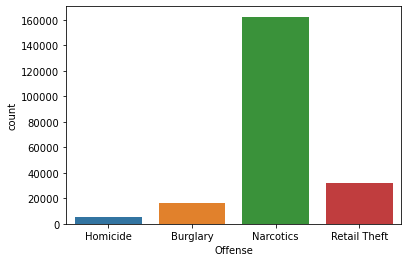

In [21]:
sns.countplot(df2['Offense'])

In [22]:
df2 = df[(df['Offense Update'] == 'Burglary') | (df['Offense Update'] == 'Retail Theft') | (df['Offense Update'] == 'Narcotics') | (df['Offense Update'] == 'Homicide')].copy()
df2['Offense Update'].value_counts()

Narcotics       165011
Retail Theft     31649
Burglary         15427
Homicide          5023
Name: Offense Update, dtype: int64

In [24]:
categorical = ['Race']
df2 = df[(df['Race'] == 'Black') | (df['Race'] == 'White') | (df['Race'] == 'Hispanic') | (df['Race'] == 'Asian') | (df['Race'] == 'American Indian')].copy()
df2['Race'].value_counts()


Black              276552
White               61802
Hispanic            11016
Asian                2888
American Indian       184
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='Age'>

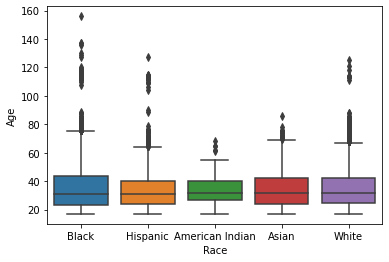

In [25]:
sorted_ou = df2.groupby(['Race'])['Age'].median().sort_values()
sns.boxplot(x=df2['Race'],y=df2['Age'], order=list(sorted_ou.index))

Gender
Female                         50185
Male                          302020
Male name, no gender given        12
Unknown                           27
dtype: int64


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Female'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Male'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Male name, no gender given'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'Unknown'),
  Text(3.5, 0, '')])

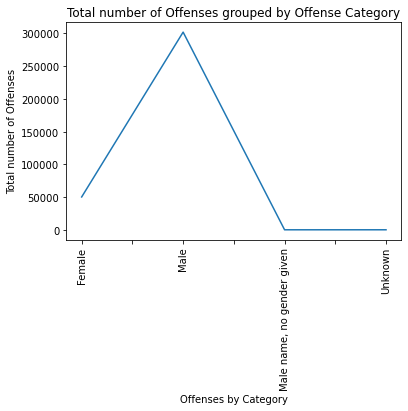

In [26]:
plot_by_offense = df2.groupby('Gender').size()
print(plot_by_offense)
plot_by_offense = plot_by_offense.plot(title='Total Number of Offenses grouped by Gender')
plot_by_offense.set_xlabel('Offenses')
plot_by_offense.set_ylabel('Count')
plt.xticks(rotation='vertical')

In [27]:
df2 = df[(df['Offense'] == 'Burglary') | (df['Offense'] == 'Retail Theft') | (df['Offense'] == 'Narcotics') | (df['Offense'] == 'Homicide')].copy()
df2['Offense'].value_counts()

Narcotics       162404
Retail Theft     31952
Burglary         16374
Homicide          5098
Name: Offense, dtype: int64

<AxesSubplot:xlabel='Offense', ylabel='Age'>

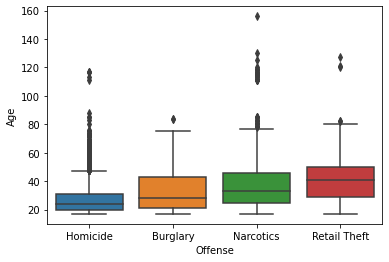

In [28]:
sorted_ou = df2.groupby(['Offense'])['Age'].median().sort_values()
sns.boxplot(x=df2['Offense'],y=df2['Age'], order=list(sorted_ou.index))

In [30]:
df4 = df[(df['Review Result'] == 'Approved') | (df['Review Result'] == 'Rejected') | (df['Review Result'] == 'Continued Investigation')].copy()
df2['Review Result'].value_counts()

Approved                                      38673
Rejected                                      10223
Continued Investigation                        2636
Felony Review                                   685
Advice                                           96
Disregard                                        91
Victim Sensitive Interview                       16
Warr Ord Warr Issued                             15
Arrest Warrant                                   14
Chief Judge Assignment To Felony Courtroom       11
Deputy Override                                   7
Warrant Exec                                      6
VICTIM SENSITIVE INT                              2
Search Warrant                                    2
Screen Felony                                     1
Name: Review Result, dtype: int64

<AxesSubplot:xlabel='Review Result', ylabel='Age'>

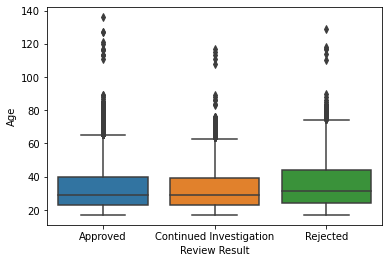

In [31]:
sorted_ou = df4.groupby(['Review Result'])['Age'].median().sort_values()
sns.boxplot(x=df4['Review Result'],y=df4['Age'], order=list(sorted_ou.index))

In [32]:
df2 = df[(df['Offense'] == 'Burglary') | (df['Offense'] == 'Retail Theft') | (df['Offense'] == 'Narcotics') | (df['Offense'] == 'Homicide')].copy()
df2['Offense'].value_counts()

Narcotics       162404
Retail Theft     31952
Burglary         16374
Homicide          5098
Name: Offense, dtype: int64

In [33]:
df3 = df[(df['Race'] == 'Black') | (df['Race'] == 'White') | (df['Race'] == 'Hispanic') | (df['Race'] == 'Asian') | (df['Race'] == 'American Indian')].copy()
df2['Race'].value_counts()

Black                               147286
White                                34134
White [Hispanic or Latino]           26088
Hispanic                              2142
Asian                                 1375
White/Black [Hispanic or Latino]      1073
Unknown                                390
American Indian                         95
Biracial                                41
ASIAN                                    2
CAUCASIAN                                1
Name: Race, dtype: int64

In [34]:
grouped = df2.groupby(['Race','Offense'])
grouped.size()

Race                              Offense     
ASIAN                             Homicide             1
                                  Retail Theft         1
American Indian                   Burglary            14
                                  Homicide             4
                                  Narcotics           49
                                  Retail Theft        28
Asian                             Burglary           118
                                  Homicide            20
                                  Narcotics          932
                                  Retail Theft       305
Biracial                          Burglary             2
                                  Narcotics           15
                                  Retail Theft        24
Black                             Burglary          9487
                                  Homicide          3738
                                  Narcotics       113464
                                  Retail 

In [35]:
g_offense = pd.crosstab(index=df2["Offense"],
                          columns=df2["Gender"])
g_offense

Gender,Female,Male,"Male name, no gender given",Unknown
Offense,,,,
Burglary,984,15066,0,2
Homicide,386,4510,0,0
Narcotics,22097,139467,3,6
Retail Theft,8882,21716,3,4


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Burglary'),
  Text(1, 0, 'Homicide'),
  Text(2, 0, 'Narcotics'),
  Text(3, 0, 'Retail Theft')])

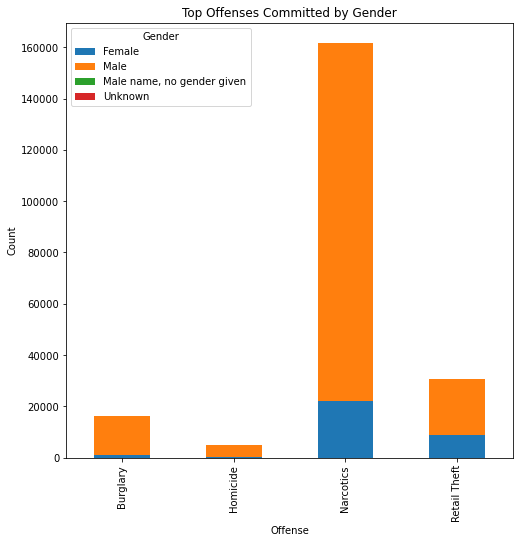

In [36]:
g_offense.plot(title='Top Four Offenses Committed by Gender',
                  kind="bar",
                  xlabel="Offense",
                  ylabel="Count",
                       figsize=(8,8),
                        stacked=True)
plt.xticks(rotation='vertical')

In [37]:
race_offense = pd.crosstab(index=df2["Offense"],
                          columns=df3["Race"])
race_offense

Race,American Indian,Asian,Black,Hispanic,White
Offense,,,,,
Burglary,14,118,9487,301,3318
Homicide,4,20,3738,138,303
Narcotics,49,932,113464,599,24432
Retail Theft,28,305,20597,1104,6081


<AxesSubplot:title={'center':'Top Offenses Committed by Race'}, xlabel='Offense', ylabel='Count'>

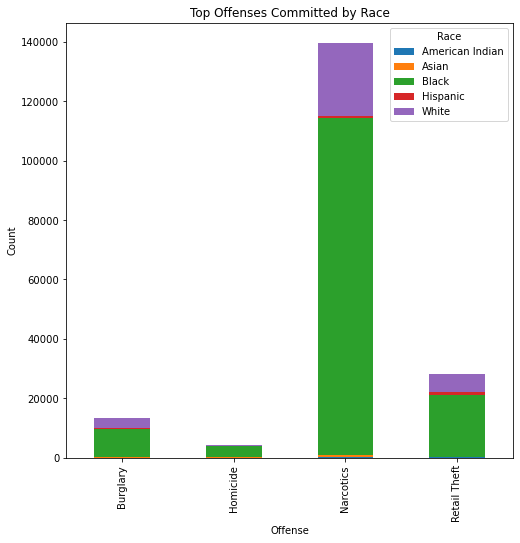

In [39]:
race_offense.plot(title='Top Four Offenses Committed by Race',
                  kind="bar",
                  xlabel="Offense",
                  ylabel="Count",
                       figsize=(8,8),
                        stacked=True)

Race
American Indian       184
Asian                2888
Black              276552
Hispanic            11016
White               61802
dtype: int64


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'American Indian'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Asian'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Black'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'Hispanic'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'White'),
  Text(4.5, 0, '')])

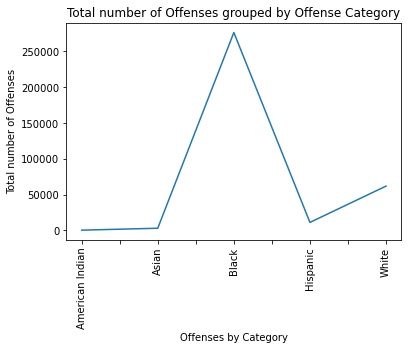

In [41]:
plot_by_offense = df3.groupby('Race').size()
print(plot_by_offense)
plot_by_offense = plot_by_offense.plot(title='Total number of Offenses grouped by Race')
plot_by_offense.set_xlabel('Offenses')
plot_by_offense.set_ylabel('Count')
plt.xticks(rotation='vertical')

Review Result
Approved                   197888
Continued Investigation     12676
Rejected                    31183
dtype: int64


(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(-0.25, 0, ''),
  Text(0.0, 0, 'Approved'),
  Text(0.25, 0, ''),
  Text(0.5, 0, ''),
  Text(0.75, 0, ''),
  Text(1.0, 0, 'Continued Investigation'),
  Text(1.25, 0, ''),
  Text(1.5, 0, ''),
  Text(1.75, 0, ''),
  Text(2.0, 0, 'Rejected'),
  Text(2.25, 0, '')])

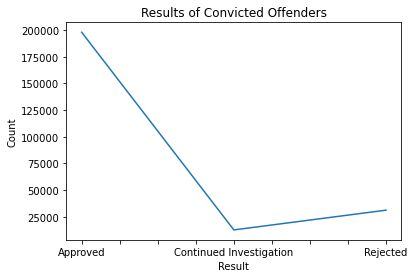

In [43]:
plot_by_offense = df4.groupby('Review Result').size()
print(plot_by_offense)
plot_by_offense = plot_by_offense.plot(title='Results of Convicted Offenders')
plot_by_offense.set_xlabel('Result')
plot_by_offense.set_ylabel('Count')
plt.xticks(rotation='horizontal')